In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

In [44]:
nadp = pd.read_csv("C:\\Users\\saina\\Desktop\\DS_ML_AI\\Scaler\\Projects_or_Case_Studies_GIT\\Network_Anomaly_Detection_Project\\Datasets\\Network_anomaly_data.csv")

In [45]:
nadp.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [46]:
nadp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                125973 non-null  int64  
 1   protocoltype            125973 non-null  object 
 2   service                 125973 non-null  object 
 3   flag                    125973 non-null  object 
 4   srcbytes                125973 non-null  int64  
 5   dstbytes                125973 non-null  int64  
 6   land                    125973 non-null  int64  
 7   wrongfragment           125973 non-null  int64  
 8   urgent                  125973 non-null  int64  
 9   hot                     125973 non-null  int64  
 10  numfailedlogins         125973 non-null  int64  
 11  loggedin                125973 non-null  int64  
 12  numcompromised          125973 non-null  int64  
 13  rootshell               125973 non-null  int64  
 14  suattempted         

In [47]:
nadp.isna().sum()

duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
land                      0
wrongfragment             0
urgent                    0
hot                       0
numfailedlogins           0
loggedin                  0
numcompromised            0
rootshell                 0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
numoutboundcmds           0
ishostlogin               0
isguestlogin              0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvrate        0
dsthostsamesrcportra

In [48]:
sum(nadp.isna().sum())

0

In [49]:
nadp.duplicated().sum()

0

In [50]:
for i in nadp.columns:
    print(f"{i:<25} :   {nadp[i].nunique()}")

duration                  :   2981
protocoltype              :   3
service                   :   70
flag                      :   11
srcbytes                  :   3341
dstbytes                  :   9326
land                      :   2
wrongfragment             :   3
urgent                    :   4
hot                       :   28
numfailedlogins           :   6
loggedin                  :   2
numcompromised            :   88
rootshell                 :   2
suattempted               :   3
numroot                   :   82
numfilecreations          :   35
numshells                 :   3
numaccessfiles            :   10
numoutboundcmds           :   1
ishostlogin               :   2
isguestlogin              :   2
count                     :   512
srvcount                  :   509
serrorrate                :   89
srvserrorrate             :   86
rerrorrate                :   82
srvrerrorrate             :   62
samesrvrate               :   101
diffsrvrate               :   95
srvdiffhostra

In [51]:
nadp["numoutboundcmds"].value_counts()

numoutboundcmds
0    125973
Name: count, dtype: int64

In [52]:
nadp.drop(["numoutboundcmds"],axis = 1, inplace = True)

In [53]:
nadp.describe(include= "all")

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
count,125973.00000,125973,125973,125973,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973,125973.000000
unique,NaN,3,70,11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,NaN
top,NaN,tcp,http,SF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal,NaN
freq,NaN,102689,40338,74945,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67343,NaN
mean,287.14465,NaN,NaN,NaN,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,...,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,NaN,19.504060
std,2604.51531,NaN,NaN,NaN,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,...,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,NaN,2.291503
min,0.00000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,0.00000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,18.000000
50%,0.00000,NaN,NaN,NaN,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,20.000000
75%,0.00000,NaN,NaN,NaN,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,NaN,21.000000


In [54]:
nadp["attack"].value_counts()

attack
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

In [55]:
def attack_category(x):
    if x in ("back","land","neptune","pod","smurf","teardrop"):
        return "dos"
    elif x in ("ftp_write","guess_passwd","imap","multihop","phf","spy","warezclient","warezmaster"):
        return "r2l"
    elif x in ("buffer_overflow","loadmodule","perl","rootkit"):
        return "u2r"
    elif x in ("ipsweep","nmap", "portsweep", "satan"):
        return "probe"
    elif x in ("normal"):
        return "normal"
    else:
        return "NAN"

In [56]:
nadp["attack_cat"] = nadp["attack"].apply(attack_category)

In [57]:
nadp["attack_cat"].value_counts()

attack_cat
normal    67343
dos       45927
probe     11656
r2l         995
u2r          52
Name: count, dtype: int64

In [58]:
d = {"normal":0,"dos":1,"probe":2,"r2l":3,"u2r":4}

In [59]:
nadp["attack_cat"] = nadp["attack_cat"].map(d)

In [60]:
nadp["attack_cat"].value_counts()

attack_cat
0    67343
1    45927
2    11656
3      995
4       52
Name: count, dtype: int64

In [61]:
nadp.drop(["attack","lastflag"],axis = 1, inplace = True)

In [62]:
def LabelEncoding(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

In [63]:
LabelEncoding(nadp)

In [64]:
nadp.describe()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack_cat
count,125973.00000,125973.000000,125973.000000,125973.000000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,1.053202,31.226469,6.979996,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,0.574980
std,2604.51531,0.426620,16.346470,2.689365,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,0.694105
min,0.00000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,1.000000,20.000000,5.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,1.000000,24.000000,9.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,1.000000,49.000000,9.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,1.000000
max,42908.00000,2.000000,69.000000,10.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [65]:
X = nadp.drop(["attack_cat"],axis = 1)
y = nadp["attack_cat"]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [67]:
y_train.value_counts()

attack_cat
0    53874
1    36741
2     9325
3      796
4       42
Name: count, dtype: int64

In [68]:
y_test.value_counts()

attack_cat
0    13469
1     9186
2     2331
3      199
4       10
Name: count, dtype: int64

In [69]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42).fit(X_train, y_train)
print("training_accuracy",clf.score(X_train,y_train))
print("test_accuracy",clf.score(X_test,y_test))

training_accuracy 0.9805016967989045
test_accuracy 0.9790037705894027


In [70]:
y_pred = clf.predict(X_test)

In [71]:
cm = confusion_matrix(y_test,y_pred)

In [72]:
cm

array([[13267,    61,    38,    73,    30],
       [   55,  9124,     7,     0,     0],
       [  108,    23,  2200,     0,     0],
       [  129,     0,     1,    69,     0],
       [    3,     0,     1,     0,     6]], dtype=int64)

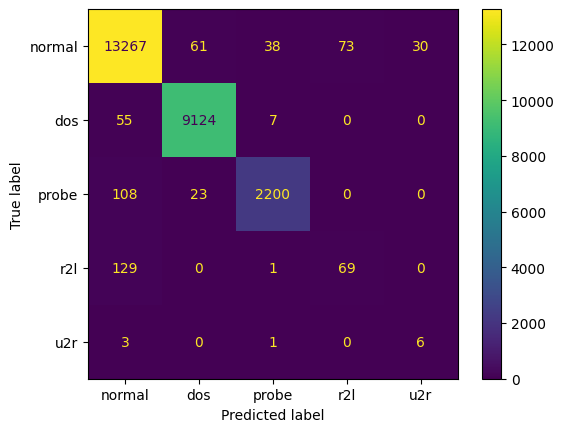

In [73]:
ConfusionMatrixDisplay(cm,display_labels=d).plot()

In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     13469
           1       0.99      0.99      0.99      9186
           2       0.98      0.94      0.96      2331
           3       0.49      0.35      0.40       199
           4       0.17      0.60      0.26        10

    accuracy                           0.98     25195
   macro avg       0.72      0.77      0.72     25195
weighted avg       0.98      0.98      0.98     25195



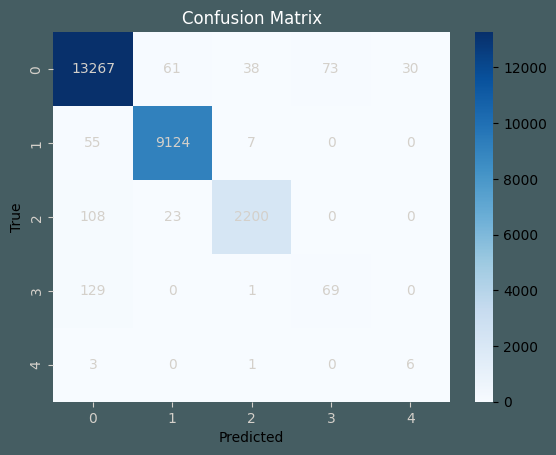

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Set background color
fig, ax = plt.subplots()
fig.patch.set_facecolor('#455d62')
ax.set_facecolor('#d4d0ca')

# Customize heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=True, annot_kws={"color": "#d4d0ca"},)

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix', color='white')

# Set tick colors
ax.xaxis.set_tick_params(color='#d4d0ca', labelcolor='#d4d0ca')
ax.yaxis.set_tick_params(color='#d4d0ca', labelcolor='#d4d0ca')

# Adjust gridline color
plt.grid(False)

plt.show()


In [76]:
d

{'normal': 0, 'dos': 1, 'probe': 2, 'r2l': 3, 'u2r': 4}

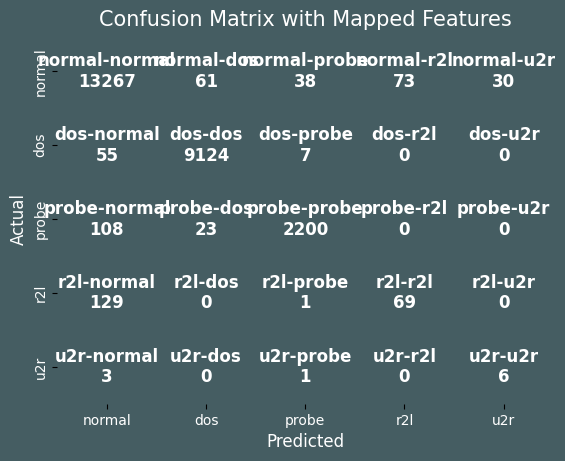

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Dictionary to map numerical labels to attack categories
d = {0: 'normal', 1: 'dos', 2: 'probe', 3: 'r2l', 4: 'u2r'}


# Create the figure with the desired background color
fig, ax = plt.subplots()
fig.patch.set_facecolor('#455d62')  # Set the background color of the figure

# Convert the confusion matrix to a string representation for annotation
labels = np.array([[f'{d[i]}-{d[j]}\n{cm[i, j]}' for j in range(len(cm))] for i in range(len(cm))])

# Plot the confusion matrix with custom color background for the matrix
sns.heatmap(cm, annot=labels, fmt='', cmap=['#455d62'], cbar=False, annot_kws={"size": 12, "weight": 'bold', "color": 'white'}, ax=ax)

# Set the axis labels and title
ax.set_xlabel('Predicted', fontsize=12, color='white')
ax.set_ylabel('Actual', fontsize=12, color='white')
ax.set_title('Confusion Matrix with Mapped Features', fontsize=15, color='white')

# Customize the ticks with the mapped labels
ax.set_xticklabels([d[i] for i in range(len(cm))], color='white')
ax.set_yticklabels([d[i] for i in range(len(cm))], color='white')

# Show the plot
plt.show()


In [82]:
y_test = np.array(y_test)

In [83]:
y_test

array([0, 3, 0, ..., 1, 0, 0], dtype=int64)

In [80]:
y_pred

array([0, 3, 0, ..., 1, 0, 0], dtype=int64)

In [84]:
df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

In [85]:
df

,Actual,Predicted
0,0,0
1,3,3
2,0,0
3,0,0
4,1,1
...,...,...
25190,0,0
25191,0,0
25192,1,1
25193,0,0


In [86]:
df.to_csv("GBDT_prediction_output",header=True)